In [2]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [12]:
col = ["age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"]
diabetes = datasets.load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns = col)
y = diabetes.target
print(type(diabetes_df))
print(diabetes_df.columns)
print(type(y))

<class 'pandas.core.frame.DataFrame'>
Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'], dtype='object')
<class 'numpy.ndarray'>


In [5]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df, y, test_size = 0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


In [8]:
print(y_test[:5])

[243. 173. 259. 156. 198.]


In [17]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

In [18]:
predictions[:10]

array([ 95.33326057,  86.82698522, 157.67942619,  99.76851845,
       172.96070973, 166.626493  , 238.03522188, 119.25426812,
       147.56473803, 130.95323136])

Text(0, 0.5, 'Predictions')

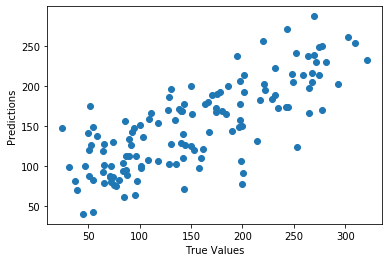

In [19]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [20]:
score = model.score(X_test, y_test)
score

0.5925492896100606

In [22]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [27]:
scores = cross_val_score(model, diabetes_df, y, cv = 10)
scores

array([0.55614411, 0.23056092, 0.35357777, 0.62190498, 0.26587602,
       0.61819338, 0.41815916, 0.43515232, 0.43436983, 0.68568514])

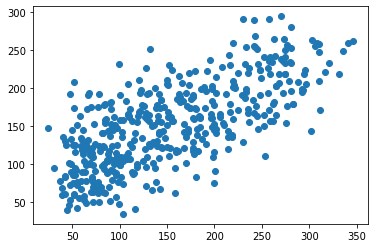

In [28]:
predictions = cross_val_predict(model, diabetes_df, y, cv = 10)
plt.scatter(y,predictions)

In [29]:
accuracy = metrics.r2_score(y, predictions)
accuracy

0.494251180618835